In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [5]:
images = np.load(BytesIO(requests.get("https://raw.githubusercontent.com/shaunzhao666/CSE881_project/main/data_model/star_coor_area_MLP.npy").content))
print(images.shape)
labels = np.load(BytesIO(requests.get("https://raw.githubusercontent.com/shaunzhao666/CSE881_project/main/data_model/labels_MLP.npy").content))
print(labels.shape)

ValueError: ignored

In [ ]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)

In [ ]:

def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(6, activation='softmax'))
    return model

# mlp_model = create_mlp_model((images.shape[1], 1))

# mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
# mlp_model.summary()

In [ ]:
accu = []
f1 = []
for k in range(16):
  images_coor_area = images[:, :(k+2)*3]
  images_cosine = images[:, 51:(51+k+1)]
  images_new = np.concatenate((images_coor_area, images_cosine), axis=1)
  x_train, x_test, y_train, y_test = train_test_split(images_new, labels_encoded, test_size=0.2, random_state=888)
  accu_iter = []
  f1_iter = []
  for i in range(10):
    mlp_model = create_mlp_model((x_train.shape[1], 1))
    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    mlp_model.fit(
      x_train,
      y_train,
      epochs=15,
      batch_size=64,
    )
    predicted_test_probmlp = mlp_model.predict(x_test)
    predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
    accu_iter.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))
    f1_iter.append(f1_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp, average = 'macro'))
  accu.append(np.mean(accu_iter))
  f1.append(np.mean(f1_iter))


Epoch 1/15
22/22 [==============================] - 3s 6ms/step - loss: 1.8192 - accuracy: 0.1809
Epoch 2/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7945 - accuracy: 0.1903
Epoch 3/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7745 - accuracy: 0.2308
Epoch 4/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7527 - accuracy: 0.2337
Epoch 5/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7494 - accuracy: 0.2388
Epoch 6/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7249 - accuracy: 0.2547
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7173 - accuracy: 0.2627
Epoch 8/15
22/22 [==============================] - 0s 7ms/step - loss: 1.6851 - accuracy: 0.2844
Epoch 9/15
22/22 [==============================] - 0s 6ms/step - loss: 1.6793 - accuracy: 0.2735
Epoch 10/15
22/22 [==============================] - 0s 6ms/step - loss: 1.6591 - accuracy: 0.2865
Epoch 11/15
22/22 [

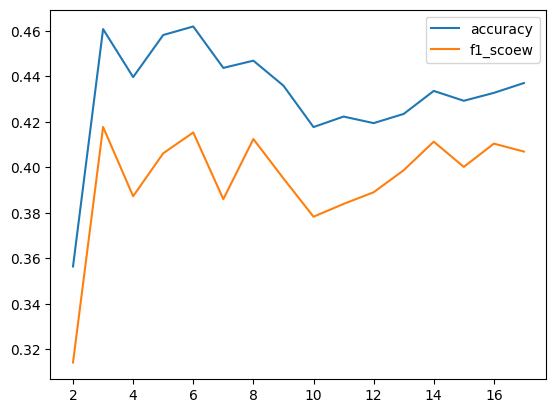

In [ ]:
plt.plot(list(range(2,18)), accu, label="accuracy")
plt.plot(list(range(2,18)), f1, label="f1_score")
plt.legend()

So max_star=6

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=888)
print(x_train.shape)
print(y_train.shape)

(1382, 67)
(1382, 6)


In [ ]:

def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(6, activation='softmax'))
    return model

# mlp_model = create_mlp_model((images.shape[1], 1))

# mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
# mlp_model.summary()


In [ ]:
accu = []
for i in range(1):
  num = i+3
  X = images[:, :num*3]
  x_train, x_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=888)
  mlp_model = create_mlp_model((x_train.shape[1], 1))
  mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  mlp_model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
  )
  predicted_test_probmlp = mlp_model.predict(x_test)
  predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
  accu.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))

Epoch 1/15
22/22 [==============================] - 1s 4ms/step - loss: 1.8346 - accuracy: 0.1874
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7823 - accuracy: 0.1918
Epoch 3/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7749 - accuracy: 0.2084
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7726 - accuracy: 0.2337
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7399 - accuracy: 0.2366
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7191 - accuracy: 0.2562
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6959 - accuracy: 0.2808
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6519 - accuracy: 0.3148
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6011 - accuracy: 0.3249
Epoch 10/15
22/22 [==============================] - 0s 4ms/step - loss: 1.5916 - accuracy: 0.3314
Epoch 11/15
22/22 [

In [ ]:
accu_cos = []
for i in range(15):
  num = i+3
  images_loop = images[:, :num*3]
  cos_loop = images[:, 51:51+num-1]
  X = np.column_stack((images_loop, cos_loop))
  x_train, x_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=888)
  mlp_model = create_mlp_model((x_train.shape[1], 1))
  mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  mlp_model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
  )
  predicted_test_probmlp = mlp_model.predict(x_test)
  predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
  accu_cos.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))



Epoch 1/15
22/22 [==============================] - 1s 4ms/step - loss: 1.8364 - accuracy: 0.1722
Epoch 2/15
22/22 [==============================] - 0s 5ms/step - loss: 1.8030 - accuracy: 0.1722
Epoch 3/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7832 - accuracy: 0.1997
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7560 - accuracy: 0.2373
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7531 - accuracy: 0.2301
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7185 - accuracy: 0.2511
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7038 - accuracy: 0.2634
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6693 - accuracy: 0.2865
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6224 - accuracy: 0.3169
Epoch 10/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6013 - accuracy: 0.3126
Epoch 11/15
22/22 [

In [ ]:
accu

[0.4595375722543353,
 0.4190751445086705,
 0.44508670520231214,
 0.3815028901734104,
 0.4653179190751445,
 0.4046242774566474,
 0.407514450867052,
 0.3959537572254335,
 0.4046242774566474,
 0.430635838150289,
 0.4393063583815029,
 0.43641618497109824,
 0.41040462427745666,
 0.4277456647398844,
 0.42196531791907516]

In [ ]:
accu_cos

[0.4624277456647399,
 0.45375722543352603,
 0.4508670520231214,
 0.45664739884393063,
 0.4508670520231214,
 0.430635838150289,
 0.44508670520231214,
 0.3901734104046243,
 0.430635838150289,
 0.4393063583815029,
 0.44508670520231214,
 0.4190751445086705,
 0.4190751445086705,
 0.42196531791907516,
 0.4508670520231214]

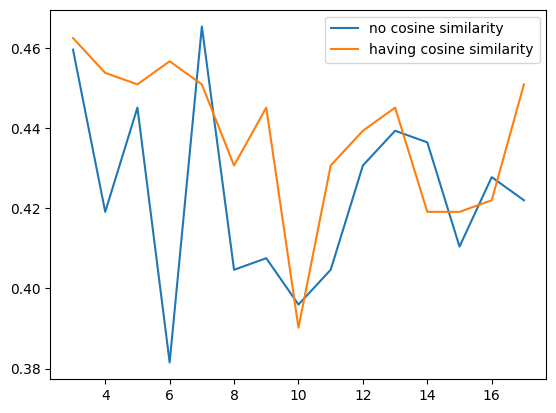

In [ ]:
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], accu, label="no cosine similarity")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], accu_cos, label="having cosine similarity")
plt.legend()

In [ ]:
mlp_model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
)

Epoch 1/15
22/22 [==============================] - 1s 4ms/step - loss: 1.8875 - accuracy: 0.1585
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.8035 - accuracy: 0.1881
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7731 - accuracy: 0.2164
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7515 - accuracy: 0.2135
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7229 - accuracy: 0.2742
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6871 - accuracy: 0.2808
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6569 - accuracy: 0.3133
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6237 - accuracy: 0.3155
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6092 - accuracy: 0.3234
Epoch 10/15
22/22 [==============================] - 0s 4ms/step - loss: 1.5911 - accuracy: 0.3560
Epoch 11/15
22/22 [

In [ ]:
predicted_test_probmlp = mlp_model.predict(x_test)
predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)

11/11 [==============================] - 0s 2ms/step


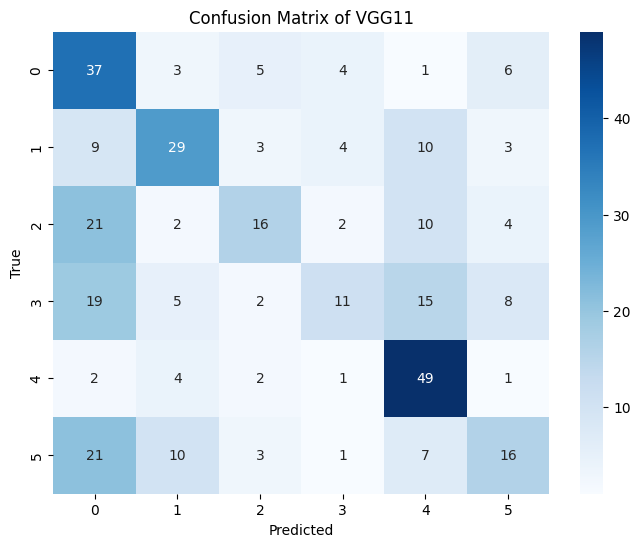

In [ ]:
cmmlp = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cmmlp, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of VGG11')
plt.show()

In [ ]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))

              precision    recall  f1-score   support

           0       0.34      0.66      0.45        56
           1       0.55      0.50      0.52        58
           2       0.52      0.29      0.37        55
           3       0.48      0.18      0.27        60
           4       0.53      0.83      0.65        59
           5       0.42      0.28      0.33        58

    accuracy                           0.46       346
   macro avg       0.47      0.46      0.43       346
weighted avg       0.47      0.46      0.43       346

